In [6]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
low_memory=False
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import scipy.stats as stats
divdrop_df= pd.read_csv("div_drop.csv") #divvy trip csv file after dropping unused column
crashdrop_df= pd.read_csv("crash_drop.csv")#traffic crash csv file after dropping unused columns
crashdrop_df.info()

C:\Users\David\AppData\Local\Temp\ipykernel_16248\1255325257.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  divdrop_df= pd.read_csv("div_drop.csv") #divvy trip csv file after dropping unused column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890350 entries, 0 to 1890349
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SAFETY_EQUIPMENT       object 
 6   INJURY_CLASSIFICATION  object 
 7   DRIVER_ACTION          object 
 8   DRIVER_VISION          object 
 9   PHYSICAL_CONDITION     object 
 10  PEDPEDAL_ACTION        object 
 11  PEDPEDAL_VISIBILITY    object 
 12  PEDPEDAL_LOCATION      object 
dtypes: float64(1), object(12)
memory usage: 187.5+ MB


In [8]:
# Step 1: Identify unique CRASH_RECORD_ID values for rows where PERSON_TYPE is BICYCLE. 
# This removes accitdents that only involved vehicles for our analysis, leaving bicycle related crashes
# Identify unique CRASH_RECORD_ID values involving Bicycles 
bicycle_crash_ids = crashdrop_df.loc[crashdrop_df['PERSON_TYPE'] == 'BICYCLE']
duplicate_crash_ids = bicycle_crash_ids[bicycle_crash_ids.duplicated(subset='CRASH_RECORD_ID', keep=False)]
bicycle_crash_ids = bicycle_crash_ids.drop_duplicates(subset='CRASH_RECORD_ID', keep='first')

# Group by quarter and count the occurrences
crashcounts_quart = bicycle_crash_ids.resample('Q', on='CRASH_DATE').size()

# Remove pre-2020 data
crashdrop_df = crashdrop_df[crashdrop_df['CRASH_DATE'].dt.year > 2019]

# Clean Divvy Date Data
divdrop_df['started_at']= pd.to_datetime(divdrop_df['started_at'], errors='coerce')
divdrop_df['started_at_date'] = divdrop_df['started_at'].dt.date

divdrop_df['quarter']=divdrop_df['started_at'].dt.to_period('Q')

quarterly_rides=divdrop_df.groupby('quarter')['ride_id'].count()

# Plotting
plt.figure(figsize=(10, 6))
crashcounts_quart.plot()

# Customize x-ticks to show only quarter and year
plt.xticks(
    crashcounts_quart.index,
    [f'Q{q.quarter}{q.year}' for q in crashcounts_quart.index()],
    rotation=45
)
plt.title('Bicycle-Related Crashes Over Time by Quarter (Starting Q1 2020)')
plt.xlabel('Quarter')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


# Second plot (Bicycle-Related Crashes) on ax2
crashcounts_quart.plot(ax= ax2, marker='o',color= 'r')
plt.set_xticks(crashcounts_quart.index)
ax2.set_xticklabels(
    [f'Q{q.quarter}-{q.year}' for q in crashcounts_quart.index],
    rotation=45)
ax2.set_title('Bicycle-Related Crashes Over Time by Quarter (Starting Q1 2020)')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Number of Crashes')
ax2.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig(os.path.join(save_dir, "Rides_Crashes_per_Quarter.png"), dpi=300)

# Display the subplots
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_16248\234982918.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  crashcounts_quart = bicycle_crash_ids.resample('Q', on='CRASH_DATE').size()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

NameError: name 'os' is not defined

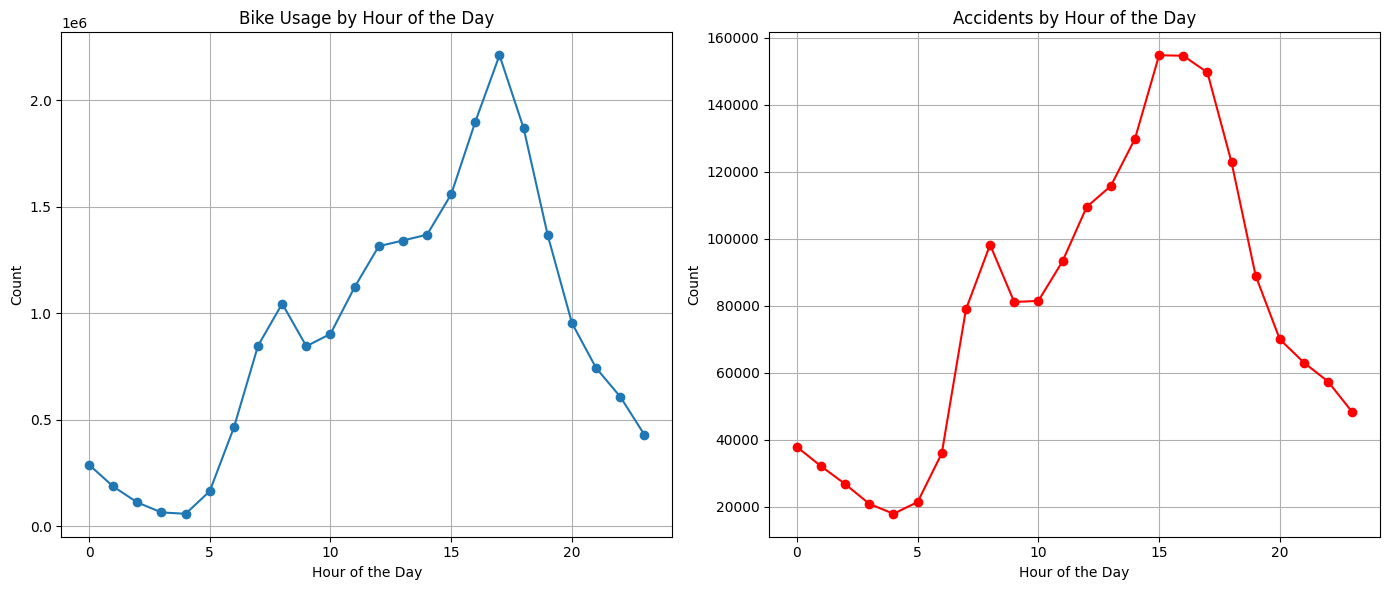

In [9]:
# Are there specific times of day or days of the week where the increase in Divvy bike usage correlates with a higher number of bike accidents or vehicular crashes? 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
low_memory=False
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import scipy.stats as stats
#Parsing the divvy data to get time data
divdrop_df["started_at"] = pd.to_datetime(divdrop_df["started_at"], errors='coerce')
divdrop_df["ended_at"] = pd.to_datetime(divdrop_df["ended_at"], errors='coerce')

#Extracting relevant time of day and day of week info for divvy data
divdrop_df['hour'] = divdrop_df["started_at"].dt.hour
divdrop_df['day_of_week'] = divdrop_df["started_at"].dt.day_name()

#Aggregating the usage to determine the size 
usage_by_hour = divdrop_df.groupby('hour').size()
usage_by_day = divdrop_df.groupby('day_of_week').size()

#Parsing the accident data to get time data
crashdrop_df["date_time"] = pd.to_datetime(crashdrop_df["CRASH_DATE"], format='%m/%d/%Y %I:%M:%S %p')

#Extracting relevant time of day and day of week info for accident data
crashdrop_df['hour'] = crashdrop_df['date_time'].dt.hour
crashdrop_df['day_of_week'] = crashdrop_df['date_time'].dt.day_name()

#Aggregating the usage to determine the size 

accidents_by_hour = crashdrop_df.groupby('hour').size()
accidents_by_day = crashdrop_df.groupby('day_of_week').size()

# Plotting bike usage and accidents by hour
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(usage_by_hour.index, usage_by_hour.values, marker='o', label='Bike Usage')
plt.title('Bike Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accidents_by_hour.index, accidents_by_hour.values, marker='o', color='r', label='Accidents')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "Usage_Accidents_by_Hour_of_Day.png"), dpi=300)
plt.show()

In [ ]:
# order the days of the week for the plots
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
usage_by_day.index = pd.CategoricalIndex(usage_by_day.index, categories=day_order, ordered=True)
accidents_by_day.index = pd.CategoricalIndex(accidents_by_day.index, categories=day_order, ordered=True)
usage_by_day = usage_by_day.sort_index()
accidents_by_day = accidents_by_day.sort_index()

# Plotting bike usage and accidents by hour
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(usage_by_day.index, usage_by_day.values, color='skyblue')
plt.title('Bike Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Divvy Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(accidents_by_day.index, accidents_by_day.values, color='salmon')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()

# Show plot
plt.show()


